In [1]:
# Install necessary packages
!apt-get install -y tesseract-ocr
!pip install pytesseract pillow requests pandas

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (25.9 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123620 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-e

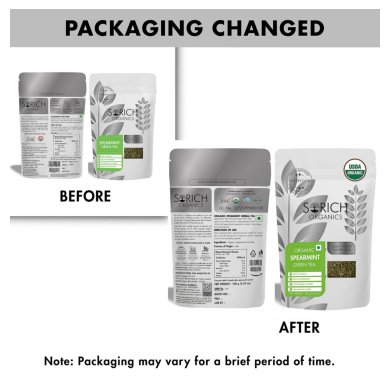

Extracted Text:
  

packaging changed

  

 

  
 
  

ox aiy satan ndpatiain sw aplnacl spearmint pure herb e|
eo anne ieee ee ee 2,1 spearmint is thot mitoculous heib vihich toke core of you

schoen ike haieharaee oar

iawn inde ord ct, hoh pots lle bl fee

dase ie sella newer of lenpiscond cece peste! cotta. voko jers homens boas

tomar gtapn ol of hom predce egons how to use

forming ond gow nour gesicide ree prod. oa eee ‘
ns ied mcg corner st, ederel ha, soso co te ne ea)

we og ou te baunty sah om motley 6, con cho be gourd, wed aso sie in vegacble
see cy ce sof erildng purrs

 

 

 

 

 

 

 

vivisonicnorcanics.con eten: som hs a
ows nutritional facts
fai (@ net ier
ss a calories 80kcal
po anaes tl obeys "se spearmint
ord totol sugor og
ee, | es eran
se ‘welt 23
cn pence ho ed oer ae os
‘hs ond send do ot by ho grec i ete one ee.
lvoe ti roth es
fos cay sony
ip ep tpn ced proves eros hon te df of agen @
ee consvee within 2 mocths after opening the pocket. rich ye
fae eeacco

In [3]:
import requests
from PIL import Image, ImageOps, ImageFilter, ImageEnhance
import pytesseract
from io import BytesIO
import re
import pandas as pd
import matplotlib.pyplot as plt

# Entity to unit mapping
entity_unit_map = {
    'width': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'depth': {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'},
    'height': {'centimetre', 'foot', 'inches', 'metre', 'millimetre', 'yard'},
    'item_weight': {'gram', 'g','kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'maximum_weight_recommendation': {'gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton'},
    'voltage': {'kilovolt', 'millivolt', 'volt'},
    'wattage': {'kilowatt', 'watt'},
    'item_volume': {'centilitre', 'cubic foot', 'cubic inch', 'cup', 'decilitre', 'fluid ounce', 'gallon',
                    'imperial gallon', 'litre', 'microlitre', 'millilitre', 'pint', 'quart'}
}

allowed_units = {unit for entity in entity_unit_map for unit in entity_unit_map[entity]}

# Function to extract text from image URL
def extract_text_from_url(image_url):
    try:
        # Fetch the image from the URL
        response = requests.get(image_url)
        response.raise_for_status()  # Raise an error for bad requests (404, etc.)

        # Convert image content to a PIL Image
        image = Image.open(BytesIO(response.content))
        image = image.convert('RGB')
        image = image.filter(ImageFilter.SHARPEN)

        plt.imshow(image)
        plt.axis('off')
        plt.show()

        #gray_image = image.convert('L')
        #gray_image = ImageOps.invert(gray_image)
        #gray_image = gray_image.point( lambda p: 255 if p > 20 else 0 )
        #gray_image = image.convert('1')
        #enhancer = ImageEnhance.Contrast(gray_image)
        #gray_image = enhancer.enhance(8)

        #plt.imshow(gray_image, cmap='gray')
        #plt.axis('off')
        #plt.show()

        # Perform OCR using Tesseract (English by default)
        text = pytesseract.image_to_string(image, lang='eng').lower()

        return text
    except Exception as e:
        return f"An error occurred: {e}"

# Function to clean the extracted text
def clean_text(text):
    # Remove extra spaces, newlines, and special characters
    return re.sub(r'\s+', ' ', text).strip().lower()

# Function to find specific entities (like height, weight, wattage) in the text
def find_specified_entities(text, specified_entities):
    found_entities = {}

    # Clean the text
    cleaned_text = clean_text(text)

    # Regex to find potential values followed by units (e.g., 20 cm, 100 kg)
    pattern = re.compile(r'(\d+\.?\d*)\s*([a-zA-Z]+)')

    matches = pattern.findall(cleaned_text)
    print(matches)
    for match in matches:
        if len(found_entities)==1:
          break
        value, unit = match[0], match[1].strip().lower()
        # Normalize the unit
        unit = unit.replace(' ', '')

        # Check if the unit is allowed and match it to the specified entities
        if unit in allowed_units:
            for entity, units in entity_unit_map.items():
                if unit in units and entity in specified_entities:
                    found_entities[entity] = f"{value} {unit}"
                    break  # Break after the first successful match for this entity

    # Return found entities and mark missing ones
    result = {}

    for entity in specified_entities:
        if entity in found_entities:
            result[entity] = found_entities[entity]
        else:
            result[entity] = "Not found"

    return result

# Example usage:
image_url = 'https://m.media-amazon.com/images/I/81dzao1Ob4L.jpg'  # Replace with your image URL
text = extract_text_from_url(image_url)
print("Extracted Text:\n", text)

# Specify the entities you want to find (e.g., height, weight, wattage)
specified_entities = ['height', 'item_weight', 'wattage']

# Find specified entities in the extracted text
entity_results = find_specified_entities(text, specified_entities)
print("Found Entities:\n", entity_results)